In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingClassifier as xgb
from sklearn.ensemble import GradientBoostingRegressor as xgb_r
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import OneHotEncoder

import datetime as dt
from datetime import datetime
 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
mpl.rcParams['agg.path.chunksize'] = 10000
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

In [2]:
#Core
df=pd.read_csv('xyz_corp_lending_data.csv',sep='\t')

C:\Users\mmoy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.index

RangeIndex(start=0, stop=855969, step=1)

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [5]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   
4     12.69        67.79     B        B5  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN         NaN          NaN   
2         NaN      NaN              NaN    NaN         NaN          NaN   
3         NaN      NaN              NaN    NaN         NaN          NaN   
4         NaN      NaN              NaN    NaN         NaN          NaN   

  default_ind  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 73 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [7]:
df.describe()

id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.550000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.500000e+04   
75%       20000.000000      15.990000     571.560000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  ...       il_util   open_rv_12m  \
count  855969.000000  855969.000000  ...  11609.000000  13288.000000   
mean       18.122165       0.311621  ...     71.486993      1.354305   
std        17.423629       0.857189  ...     23.015293      1.483710   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%        11.880000       0.000000  ...     58.500000      0.000000   
50%        17.610000       0.000000  ...     75.000000      1.000000   
75%        23.900000       0.000000  ...     87.500000      2.000000   
max      9999.000000      39.000000  ...    223.300000     22.000000   

        open_rv_24m    max_bal_bc      all_util  total_rev_hi_lim  \
count  13288.000000  13288.000000  13288.000000      7.886560e+05   
mean       2.945515   5840.443332     61.024526      3.216357e+04   
std        2.595313   5108.500262     20.018117      3.769964e+04   
min        0.000000      0.000000      0.000000      0.000000e+00   
25%        1.000000   2405.000000     47.900000      1.400000e+04   
50%        2.000000   4485.500000     62.100000      2.380000e+04   
75%        4.000000   7701.250000     75.300000      3.990000e+04   
max       43.000000  83047.000000    151.400000      9.999999e+06   

             inq_fi   total_cu_tl  inq_last_12m    default_ind  
count  13288.000000  13288.000000  13288.000000  855969.000000  
mean       0.947772      1.524232      1.841963       0.054286  
std        1.441667      2.697601      2.975049       0.226581  
min        0.000000      0.000000     -4.000000       0.000000  
25%        0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      2.000000       0.000000  
75%        1.000000      2.000000      3.000000       0.000000  
max       15.000000     33.000000     32.000000       1.000000  

[8 rows x 52 columns]

In [8]:
df.shape

(855969, 73)

In [9]:
#Core
nullity=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

In [10]:
nullity

dti_joint                      99.948596
verification_status_joint      99.948363
annual_inc_joint               99.948363
il_util                        98.643759
mths_since_rcnt_il             98.488964
total_bal_il                   98.447607
inq_last_12m                   98.447607
open_acc_6m                    98.447607
open_il_6m                     98.447607
open_il_24m                    98.447607
open_il_12m                    98.447607
open_rv_12m                    98.447607
open_rv_24m                    98.447607
max_bal_bc                     98.447607
all_util                       98.447607
inq_fi                         98.447607
total_cu_tl                    98.447607
desc                           85.769111
mths_since_last_record         84.674211
mths_since_last_major_derog    75.099682
mths_since_last_delinq         51.381767
next_pymnt_d                   29.553757
tot_cur_bal                     7.863953
tot_coll_amt                    7.863953
total_rev_hi_lim

In [11]:
df['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [12]:
#Core
df=df[nullity[nullity<50].index]
df=df.drop('policy_code',axis=1)

In [13]:
df.shape

(855969, 51)

In [14]:
#Core
correl=df.corr()
#correl

<AxesSubplot:>

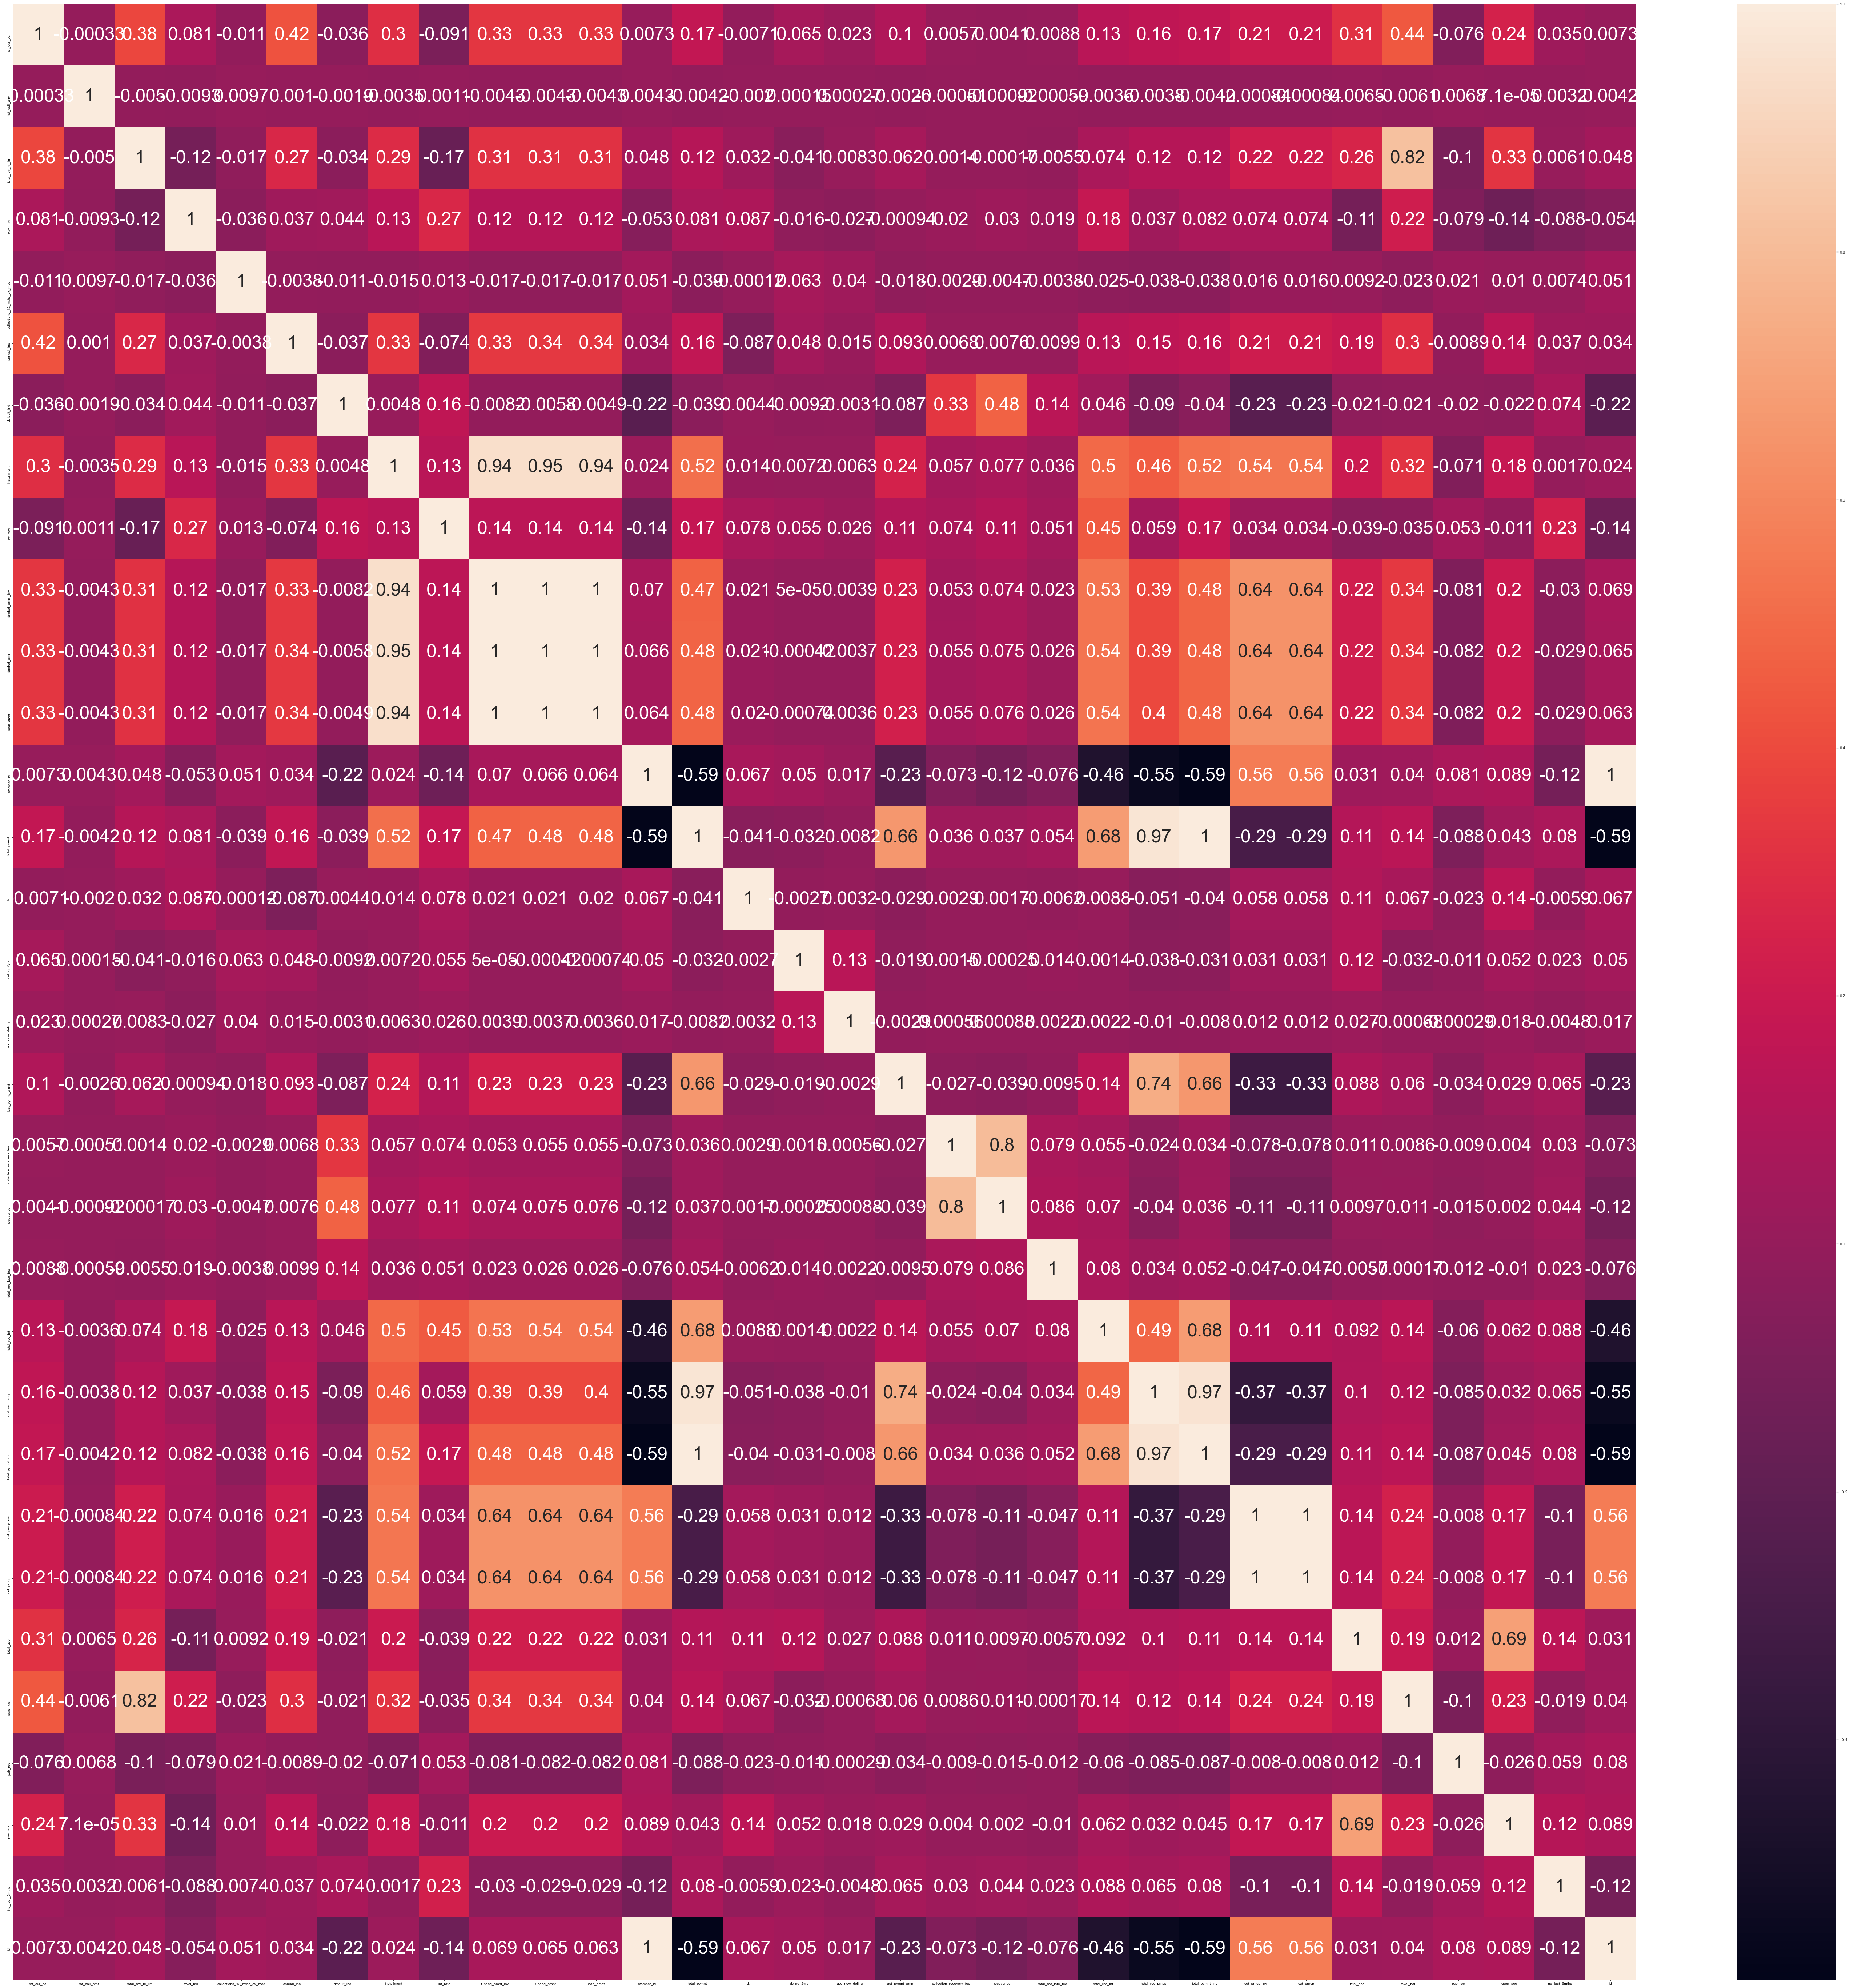

In [15]:
fig, ax = plt.subplots(figsize=(100,100))
sns.set(font_scale = 1)
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns,annot=True,ax=ax,annot_kws={"fontsize":50})

In [16]:
#Core
df=df.drop(['funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','id','member_id','total_rec_prncp'],axis=1)

<AxesSubplot:>

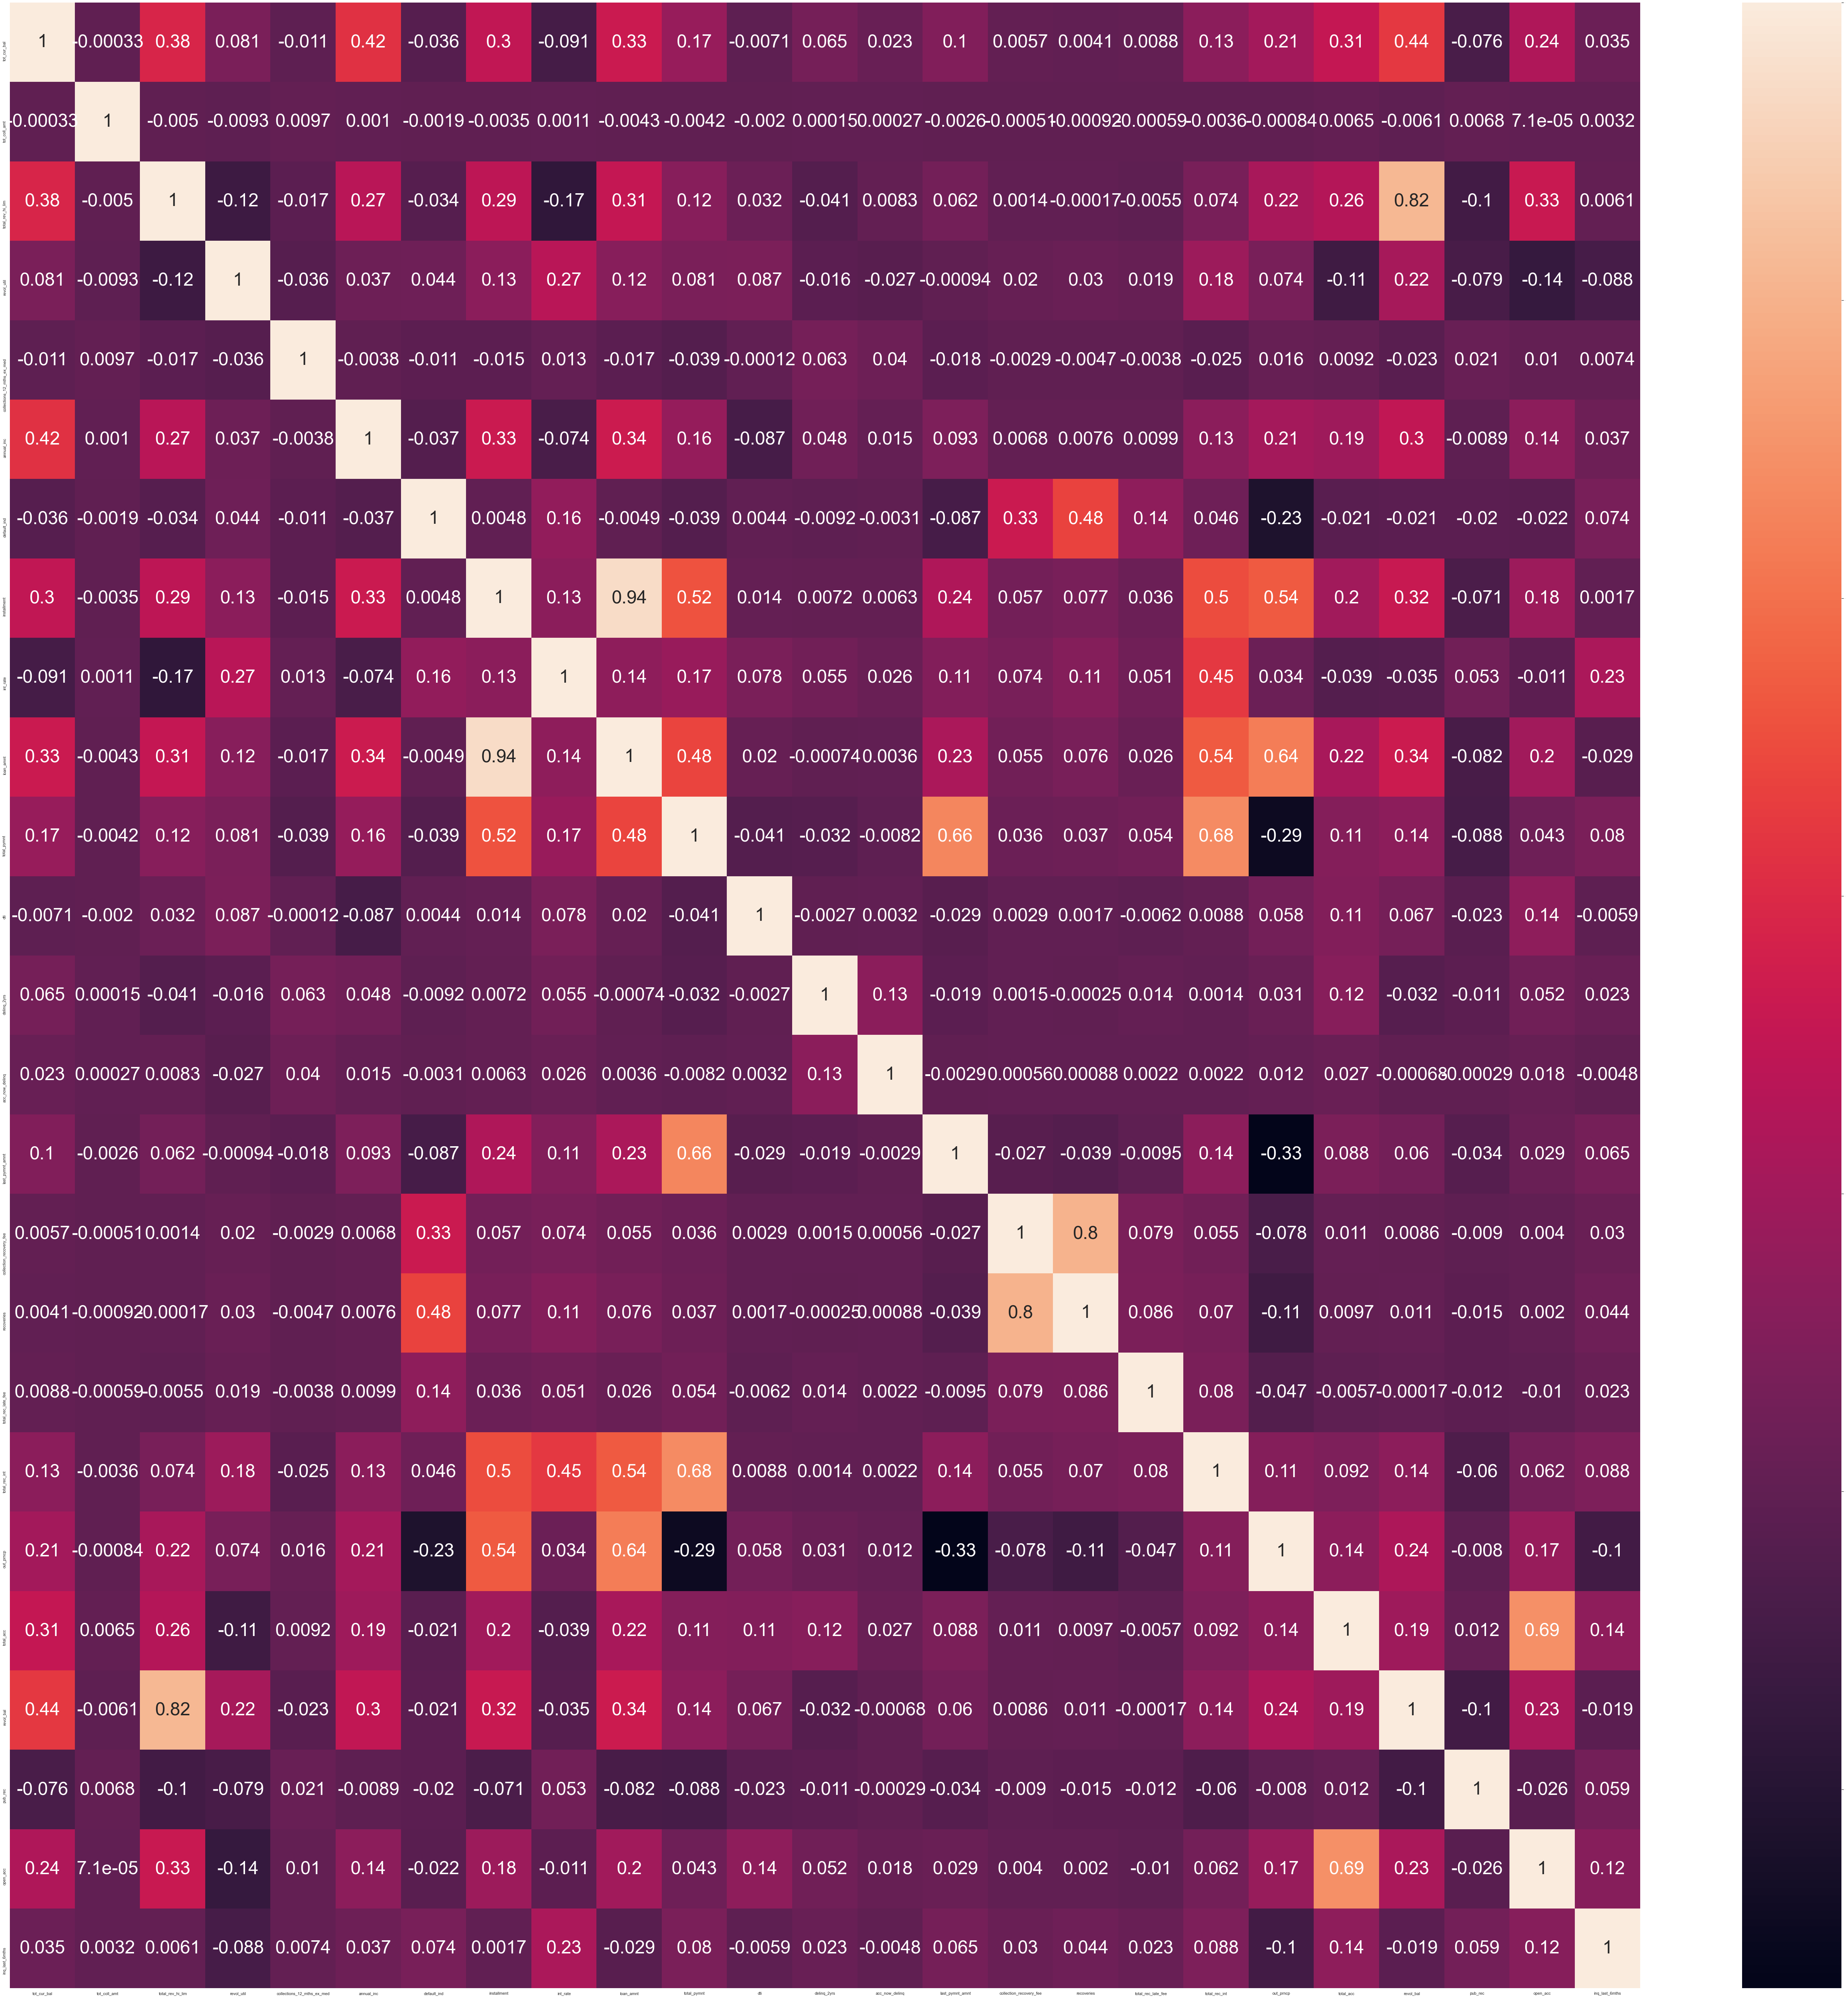

In [17]:
fig, ax = plt.subplots(figsize=(100,100))
sns.set(font_scale = 0.001)
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns,annot=True,ax=ax,annot_kws={"fontsize":50})

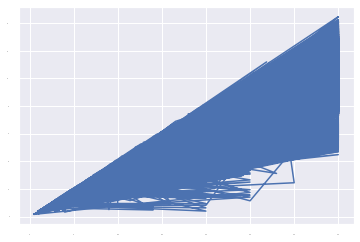

In [18]:
fig,ax = plt.subplots(1)

# create some x data and some integers for the y axis
x = df['loan_amnt']
y = df['installment']

# plot the data
ax.plot(x,y)

In [19]:
comp_df=df[['loan_amnt','installment']]

In [20]:
comp_df['division']=comp_df['loan_amnt']/comp_df['installment']

<ipython-input-20-f1d02da25db7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['division']=comp_df['loan_amnt']/comp_df['installment']


In [21]:
comp_df

loan_amnt  installment   division
0          5000.0       162.87  30.699331
1          2500.0        59.83  41.785058
2          2400.0        84.33  28.459623
3         10000.0       339.31  29.471575
4          3000.0        67.79  44.254315
...           ...          ...        ...
855964    10000.0       332.10  30.111412
855965    24000.0       797.03  30.111790
855966    13000.0       316.07  41.130129
855967    12000.0       317.86  37.752470
855968    20000.0       664.20  30.111412

[855969 rows x 3 columns]

In [22]:
comp_df['division'].describe()

count    855969.000000
mean         33.554583
std           5.855275
min          23.865472
25%          29.600395
50%          31.368030
75%          37.751940
max         504.286435
Name: division, dtype: float64

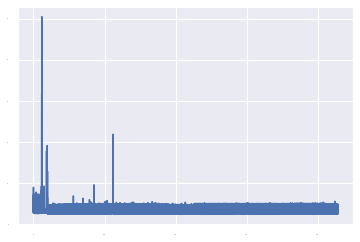

In [23]:
plt.plot(comp_df['division'])

C:\Users\mmoy\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='division', ylabel='Density'>

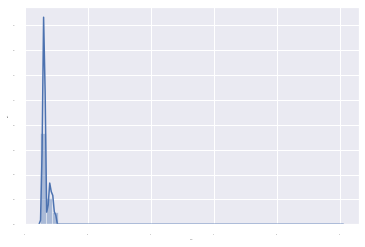

In [24]:
sns.distplot(comp_df['division'])

In [25]:
#Core
df=df.drop('installment',axis=1)

In [26]:
nullity=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
nullity

next_pymnt_d                  29.553757
tot_cur_bal                    7.863953
tot_coll_amt                   7.863953
total_rev_hi_lim               7.863953
emp_title                      5.776261
emp_length                     5.030673
last_pymnt_d                   1.035318
revol_util                     0.052105
collections_12_mths_ex_med     0.006542
last_credit_pull_d             0.005841
title                          0.003855
int_rate                       0.000000
purpose                        0.000000
pymnt_plan                     0.000000
issue_d                        0.000000
verification_status            0.000000
annual_inc                     0.000000
home_ownership                 0.000000
default_ind                    0.000000
sub_grade                      0.000000
grade                          0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
recoveries                     0.000000
open_acc                       0.000000


In [27]:
correl=df.corr()
correl

tot_cur_bal  tot_coll_amt  total_rev_hi_lim  \
tot_cur_bal                    1.000000     -0.000331          0.384867   
tot_coll_amt                  -0.000331      1.000000         -0.005025   
total_rev_hi_lim               0.384867     -0.005025          1.000000   
revol_util                     0.080583     -0.009252         -0.117724   
collections_12_mths_ex_med    -0.010622      0.009686         -0.016808   
annual_inc                     0.422618      0.001005          0.271059   
default_ind                   -0.036335     -0.001921         -0.033620   
int_rate                      -0.091430      0.001129         -0.165533   
loan_amnt                      0.329130     -0.004272          0.312072   
total_pymnt                    0.169289     -0.004203          0.120593   
dti                           -0.007133     -0.001995          0.032430   
delinq_2yrs                    0.064618      0.000154         -0.040575   
acc_now_delinq                 0.022804      0.000267          0.008254   
last_pymnt_amnt                0.103113     -0.002568          0.062068   
collection_recovery_fee        0.005704     -0.000514          0.001399   
recoveries                     0.004063     -0.000919         -0.000171   
total_rec_late_fee             0.008831     -0.000592         -0.005545   
total_rec_int                  0.134022     -0.003562          0.073855   
out_prncp                      0.207565     -0.000840          0.221319   
total_acc                      0.311268      0.006463          0.255391   
revol_bal                      0.443059     -0.006117          0.820800   
pub_rec                       -0.075956      0.006816         -0.100227   
open_acc                       0.244465      0.000071          0.325179   
inq_last_6mths                 0.034806      0.003181          0.006089   

                            revol_util  collections_12_mths_ex_med  \
tot_cur_bal                   0.080583                   -0.010622   
tot_coll_amt                 -0.009252                    0.009686   
total_rev_hi_lim             -0.117724                   -0.016808   
revol_util                    1.000000                   -0.035707   
collections_12_mths_ex_med   -0.035707                    1.000000   
annual_inc                    0.036753                   -0.003789   
default_ind                   0.044497                   -0.010650   
int_rate                      0.271687                    0.012841   
loan_amnt                     0.119635                   -0.017042   
total_pymnt                   0.080945                   -0.038618   
dti                           0.086649                   -0.000117   
delinq_2yrs                  -0.016299                    0.063019   
acc_now_delinq               -0.027270                    0.040197   
last_pymnt_amnt              -0.000939                   -0.017771   
collection_recovery_fee       0.019880                   -0.002866   
recoveries                    0.029601                   -0.004684   
total_rec_late_fee            0.019445                   -0.003835   
total_rec_int                 0.183754                   -0.024670   
out_prncp                     0.074353                    0.015653   
total_acc                    -0.114616                    0.009181   
revol_bal                     0.217785                   -0.022552   
pub_rec                      -0.079050                    0.020874   
open_acc                     -0.144959                    0.009998   
inq_last_6mths               -0.088353                    0.007364   

                            annual_inc  default_ind  int_rate  loan_amnt  \
tot_cur_bal                   0.422618    -0.036335 -0.091430   0.329130   
tot_coll_amt                  0.001005    -0.001921  0.001129  -0.004272   
total_rev_hi_lim              0.271059    -0.033620 -0.165533   0.312072   
revol_util                    0.036753     0.044497  0.271687   0.119635   
collections_12_mths_e

In [33]:
df.head(200)

next_pymnt_d  tot_cur_bal  tot_coll_amt  total_rev_hi_lim  \
0            NaN          NaN           NaN               NaN   
1            NaN          NaN           NaN               NaN   
2            NaN          NaN           NaN               NaN   
3            NaN          NaN           NaN               NaN   
4       Feb-2016          NaN           NaN               NaN   
..           ...          ...           ...               ...   
195          NaN          NaN           NaN               NaN   
196          NaN          NaN           NaN               NaN   
197          NaN          NaN           NaN               NaN   
198          NaN          NaN           NaN               NaN   
199          NaN          NaN           NaN               NaN   

                    emp_title emp_length last_pymnt_d  revol_util  \
0                         NaN  10+ years     Jan-2015        83.7   
1                       Ryder   < 1 year     Apr-2013         9.4   
2                         NaN  10+ years     Jun-2014        98.5   
3         AIR RESOURCES BOARD  10+ years     Jan-2015        21.0   
4    University Medical Group     1 year     Jan-2016        53.9   
..                        ...        ...          ...         ...   
195              Corning Inc.    8 years     Oct-2012        86.2   
196                       UPS  10+ years     Sep-2014        89.1   
197           Gilbert Express    5 years     Jan-2015        55.4   
198             Talbert House    4 years     Jan-2015        58.7   
199                       NaN    6 years     Jan-2014        90.8   

     collections_12_mths_ex_med last_credit_pull_d                    title  \
0                           0.0           Jan-2016                 Computer   
1                           0.0           Sep-2013                     bike   
2                           0.0           Jan-2016     real estate business   
3                           0.0           Jan-2015                 personel   
4                           0.0           Jan-2016                 Personal   
..                          ...                ...                      ...   
195                         0.0           Feb-2013  Debt Consolidation Loan   
196                         0.0           Aug-2014  Debt Consolidation Loan   
197                         0.0           Sep-2015  Debt Consolidation Loan   
198                         0.0           Jan-2016  Debt Consolidation Loan   
199                         0.0           Jan-2016                  LC Loan   

                purpose pymnt_plan   issue_d verification_status  annual_inc  \
0           credit_card          n  Dec-2011            Verified     24000.0   
1                   car          n  Dec-2011     Source Verified     30000.0   
2        small_business          n  Dec-2011        Not Verified     12252.0   
3                 other          n  Dec-2011     Source Verified     49200.0   
4                 other          n  Dec-2011     Source Verified     80000.0   
..                  ...        ...       ...                 ...         ...   
195               other          n  Dec-2011        Not Verified     70000.0   
196  debt_consolidation          n  Dec-2011            Verified    100000.0   
197  debt_consolidation          n  Dec-2011     Source Verified     50000.0   
198  debt_consolidation          n  Dec-2011        Not Verified     35000.0   
199  debt_consolidation          n  Dec-2011            Verified     75000.0   

    home_ownership  default_ind sub_grade grade  int_rate        term  \
0             RENT            0        B2     B     10.65   36 months   
1             RENT            1        C4     C     15.27   60 months   
2             RENT            0        C5     C     15.96   36 months   
3             RENT            0        C1     C     13.49   36 months   
4             RENT            0        B5     B     12.69   60 months   
..             ...          ...       ...   ..

In [35]:
#df.to_csv('attempt1')

In [41]:
col=df.columns
for col in df[col]:
    print(col, ' ' ,df[[col]].value_counts())

next_pymnt_d   next_pymnt_d
Feb-2016        534094
Jan-2016         68838
Mar-2016            66
dtype: int64
tot_cur_bal   tot_cur_bal
0.0            121
22396.0         21
27316.0         20
34574.0         20
29232.0         20
              ... 
263542.0         1
263541.0         1
263538.0         1
263537.0         1
186014.0         1
Length: 322286, dtype: int64
tot_coll_amt   tot_coll_amt
0.0             677062
50.0              1688
100.0             1307
75.0               998
200.0              688
                 ...  
8707.0               1
8706.0               1
3528.0               1
3529.0               1
9152545.0            1
Length: 10138, dtype: int64
total_rev_hi_lim   total_rev_hi_lim
15000.0             2554
10000.0             2525
12000.0             2519
13000.0             2507
14500.0             2502
                    ... 
52847.0                1
52829.0                1
52821.0                1
52820.0                1
43210.0                1
Length

loan_amnt   loan_amnt
10000.0      59793
12000.0      48618
15000.0      45654
20000.0      45352
35000.0      34854
             ...  
950.0            1
800.0            1
750.0            1
725.0            1
700.0            1
Length: 1368, dtype: int64
zip_code   zip_code
945xx       9466
750xx       9111
112xx       8894
606xx       8370
300xx       7820
            ... 
511xx          1
835xx          1
709xx          1
849xx          1
507xx          1
Length: 931, dtype: int64
total_pymnt   total_pymnt 
0.000000        8960
938.060000       134
648.570000       133
623.860000       131
1566.460000      117
                ... 
11606.323280       1
11606.350000       1
11606.410000       1
11606.790000       1
7630.422922        1
Length: 494607, dtype: int64
dti   dti    
19.20      656
14.40      653
18.00      638
16.80      610
13.20      604
          ... 
44.40        1
1092.52      1
44.33        1
44.24        1
672.52       1
Length: 4074, dtype: int64
delinq_2yrs   de

In [ ]:
#To Explore

#pymnt_plan
#application_type

In [45]:
df['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [46]:
df['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [49]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [47]:
df['next_pymnt_d'].value_counts()

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [50]:
#Core
df=df.drop(['pymnt_plan','application_type'],axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   next_pymnt_d                602998 non-null  object 
 1   tot_cur_bal                 788656 non-null  float64
 2   tot_coll_amt                788656 non-null  float64
 3   total_rev_hi_lim            788656 non-null  float64
 4   emp_title                   806526 non-null  object 
 5   emp_length                  812908 non-null  object 
 6   last_pymnt_d                847107 non-null  object 
 7   revol_util                  855523 non-null  float64
 8   collections_12_mths_ex_med  855913 non-null  float64
 9   last_credit_pull_d          855919 non-null  object 
 10  title                       855936 non-null  object 
 11  purpose                     855969 non-null  object 
 12  pymnt_plan                  855969 non-null  object 
 13  issue_d       

In [ ]:
#Types of Attributes that are not floats/integers

#categorical
#empt_title
#empl_lenght TO CHANGE
#title
#purpose
#verification_status
#pymnt_plan
#home_ownership
#sub_grade
#grade
#term TO CHANGE
#addr_state
#zip_code
#application_type
#initial_list_status


#date
#next_pymnt_d
#last_pymnt_d
#last_credit_pull_d
#issue_d
#earliest_cr_line

#y
#default_ind